In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sympy as sp
from sympy import Symbol, solve, Eq 
from sympy.plotting import plot
from sympy.physics.mechanics import *
sp.init_printing(
    use_unicode=True,
    use_latex="mathjax",
    latex_mode="equation",
    pretty_print=True,
    wrap_line=True,
    num_columns=3,
    )

In [8]:
g, m, t, v0, y, v, a = sp.symbols("g m t v0 y v a")
eq1 = sp.Eq(v, sp.sqrt(v0 ** 2 + 2 * g * y))
eq2 = sp.Eq(y, v0 * t + 0.5 * g * t ** 2)
eq3 = sp.Eq(a, -g)
eq1, eq2, eq3

⎛
⎜
⎝

 
 
v

 
 
 

 
 
=

 
 
 

 
 
╲

 
 
╱

 
╱
 

_
 
 

_
 
2

_
 
⋅

_
 
g

_
 
⋅

_
 
y

_
 
 

_
 
+

_
 
 

_
 
v

_
 
₀

_
2
 

_
 
 

 
 
,

 
 
 

 
 
y

 
 
 

 
 
=

 
 
 

 
 
0

 
 
.

 
 
5

 
 
⋅

 
 
g

 
 
⋅

 
 
t

 
2
 

 
 
 

 
 
+

 
 
 

 
 
t

 
 
⋅

 
 
v

 
 
₀

 
 
,

 
 
 

 
 
a

 
 
 

 
 
=

 
 
 

 
 
-

 
 
g

⎞
⎟
⎠

In [9]:
# há duas variáveis: tempo e distância, onde distância, é decomposta em range e height, onde tempos o alcance (x) e a altura (y)

### propriedades

massa = 17.60 #kg
g = -9.81 # m/s²
v0 = 19 # m/s

medicoes = {
    "t1":[0, 0],
    "t2":[0.1, 2],
    "t3":[0.22, 4],
    "t4":[0.34, 6],
    "t5":[0.48, 8],
    "t6":[0.62, 10],
    "t7":[0.79, 12],
    "t8":[0.99, 14],
    "t9":[1.25, 16],
    "t10":[1.93, 18.39]
}

medicoes2 = {
    "t1":[0.3, 4.96],
    "t2":[0.6, 9.03],
    "t3":[0.7, 10.2],
    "t4":[0.9, 12.23],
    "t5":[1.4, 15.59],
    "t6":[2.2, 15.86],
    "t7":[2.7, 12.84],
    "t8":[3.0, 9.85],
    "t9":[3.2, 7.37],
    "t10":[3.5, 2.91]
}


# Tabela experimental exigida no tópico 5

In [10]:
df = pd.DataFrame(medicoes)
df = df.T
df.rename(columns={0:"tempo (s)", 1:"distância (m)"}, inplace=True)
df

,tempo (s),distância (m)
t1,0.00,0.00
t2,0.10,2.00
t3,0.22,4.00
t4,0.34,6.00
t5,0.48,8.00
t6,0.62,10.00
t7,0.79,12.00
t8,0.99,14.00
t9,1.25,16.00
t10,1.93,18.39


# Condições iniciais (tóipico 6):
V0 = 19 # m/s j
g = -9,81 # m/s² j (aceleração da gravidade)

origem = (0,0)

Tipo de movimento: MRUV

# função horária da posição (tópico 7)
y = v0* t + 0.5 * g * t ** 2
y = 18 * t - 4.905 * t ** 2   # (m)

In [12]:
eq0 = sp.Eq(y, v0 * t + 0.5 * g * t ** 2)
eq0

 
y

 
 

 
=

 
 

 
-

 
 

 
4

 
.

 
9

 
0

 
5

 
⋅

 
t

2
 

 
 

 
+

 
 

 
1

 
9

 
⋅

 
t

In [13]:
eq0.subs(t, 0.7)

y
 
=
 
1
0
.
8
9
6
5
5


# função horária da velocidade (tópico 8)
v = np.sqrt(v0 ** 2 + 2 * g * y) # (m/s)

In [14]:
eq1 = sp.Eq(v, sp.sqrt(v0 ** 2 + 2 * g * y))
eq1

 
v

 
 

 
=

 
 

 
1

 
9

 
⋅

 
╲

 
╱

_
 

_
1

_
 

_
-

_
 

_
0

_
.

_
0

_
5

_
4

_
3

_
4

_
9

_
0

_
3

_
0

_
4

_
7

_
0

_
9

_
1

_
4

_
1

_
⋅

_
y

_
 

In [15]:
eq1.subs(y, 10.2)

v
 
=
 
1
2
.
6
8
3
6
9
0
3
1
4
7
3
1


# função horária da aceleração (tópico 9)
a = -9.81 # (m/s²)

In [16]:
eq3

a
 
=
 
-
g

In [17]:
eq3.subs({'g': -9.81})

a
 
=
 
9
.
8
1


# Tabela experimental exigida no tópico 10

In [18]:
medicoes_velocidade = list(map(lambda d: np.sqrt(v0 ** 2 + 2 * g * d[1]), medicoes.values()))
df['velocidade (m/s)'] = medicoes_velocidade
df['aceleração (m/s²)'] = -9.81
df

,tempo (s),distância (m),velocidade (m/s),aceleração (m/s²)
t1,0.00,0.00,19.000000,-9.81
t2,0.10,2.00,17.937670,-9.81
t3,0.22,4.00,16.808331,-9.81
t4,0.34,6.00,15.597436,-9.81
t5,0.48,8.00,14.284257,-9.81
t6,0.62,10.00,12.837445,-9.81
t7,0.79,12.00,11.205356,-9.81
t8,0.99,14.00,9.290856,-9.81
t9,1.25,16.00,6.861487,-9.81
t10,1.93,18.39,0.433820,-9.81


# Gráficos: poisção x tempo (tópico 11) 

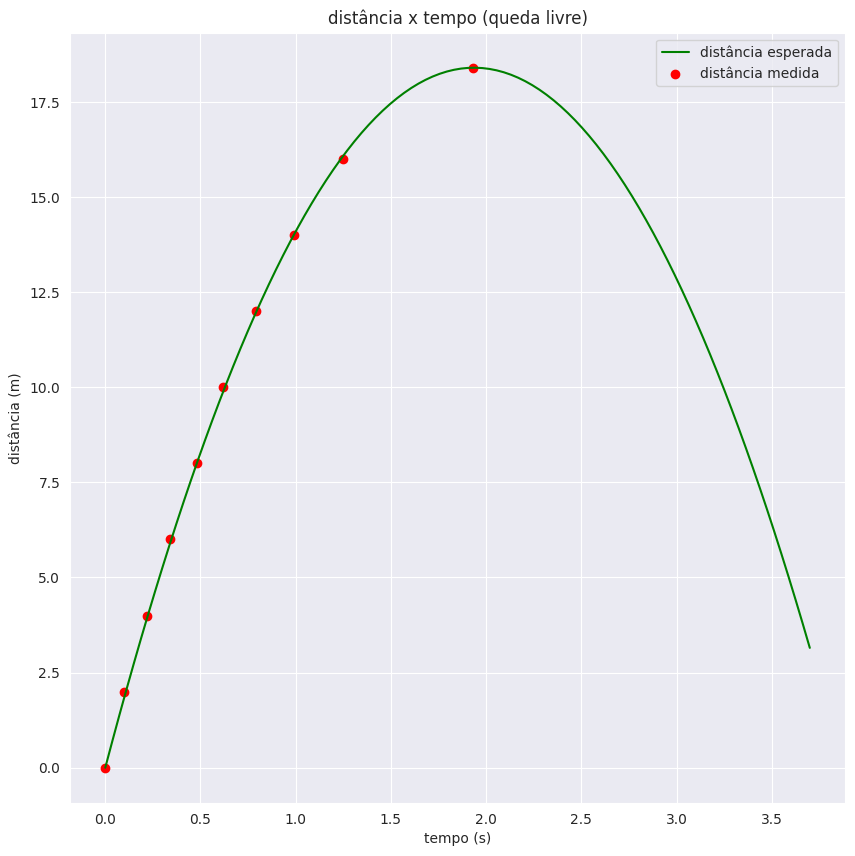

In [19]:
d_waited = list(map(lambda t: v0* t + 0.5 * g * t ** 2, np.linspace(0, 3.7, 100)))
ax, fig = plt.subplots(figsize=(10, 10))
plt.plot(np.linspace(0, 3.7, 100), d_waited, label="distância esperada", color="green")
plt.scatter(df['tempo (s)'], df['distância (m)'], label="distância medida", color="red")
plt.xlabel("tempo (s)")
plt.ylabel("distância (m)")
plt.title("distância x tempo (queda livre)")
plt.legend()
plt.show()

# Gráficos: velocidade x tempo (tópico 12)

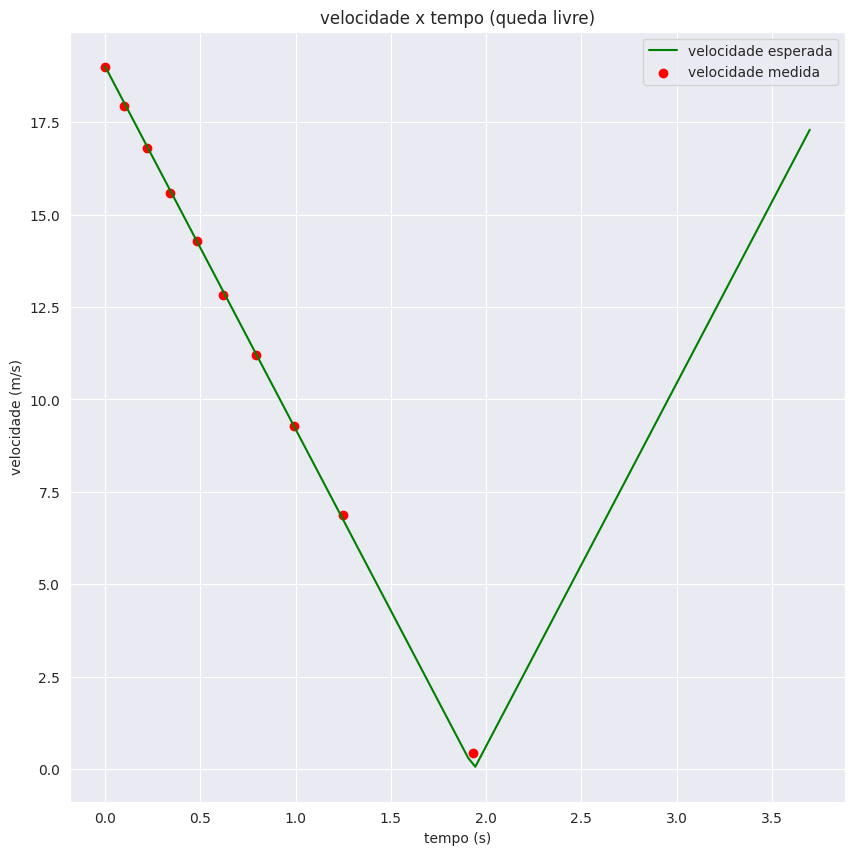

In [23]:
v_waited = list(map(lambda d: np.sqrt(v0 ** 2 + 2 * g * d), d_waited))

ax2, fig2 = plt.subplots(figsize=(10, 10))
plt.plot(np.linspace(0, 3.7, 100), v_waited, label="velocidade esperada", color="green")
plt.scatter(df['tempo (s)'], df['velocidade (m/s)'], label="velocidade medida", color="red")
plt.xlabel("tempo (s)")
plt.ylabel("velocidade (m/s)")
plt.title("velocidade x tempo (queda livre)")
plt.legend()
plt.show()

# Gráficos: aceleração x tempo (tópico 13)

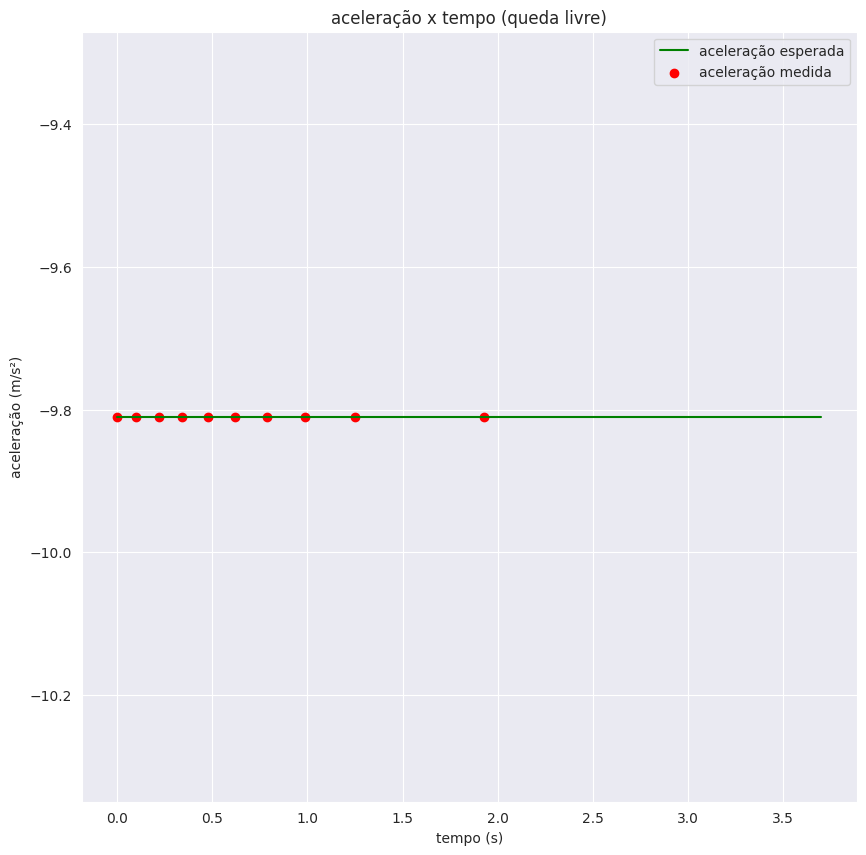

In [24]:
ax3, fig3 = plt.subplots(figsize=(10, 10))

plt.plot(np.linspace(0, 3.7, 100), np.full(100, -9.81), label="aceleração esperada", color="green")
plt.scatter(df['tempo (s)'], df['aceleração (m/s²)'], label="aceleração medida", color="red")
plt.xlabel("tempo (s)")
plt.ylabel("aceleração (m/s²)")
plt.title("aceleração x tempo (queda livre)")
plt.legend()
plt.show()


# Perguntas
### 1. O referencial adotado foi a base do canhão, assim considerando a origem como o ponto de lançamento do projétil.

### 2. O sistema de coordenadas escolhido foi o cartesiano, com escala em metros e segundos, orientado para o eixo x para a direita e para o eixo y para cima.

### 3. Os gráficos gerados estão no tópico 11, 12 e 13.

### 4. No caso em que o gráfico está transladado para além do alcance máximo do projétil, os valores de posição são negativos, pois o projétil está abaixo da origem. As curvas dos gráficos permaneceriam as mesmas, apenas o gráfico de posição x tempo seria transladada para baixo.